In [33]:
%matplotlib inline

import tensorflow as tf
from tensorflow.keras import layers

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [112]:
img0 = plt.imread("./2-bn_0.jpg")
img1 = plt.imread("./2-bn_1.jpg")
img2 = plt.imread("./2-bn_2.jpg")

In [132]:
img0 = np.zeros((256, 256, 3))
img1 = np.ones((256, 256, 3))
img2 = np.zeros((256, 256, 3))

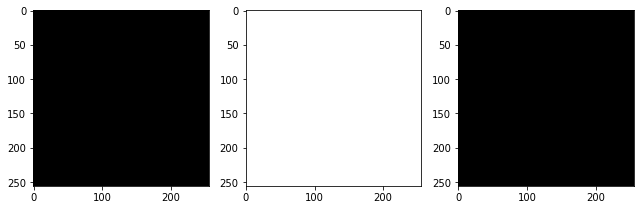

In [133]:
fig, axs = plt.subplots(ncols=3, figsize=(9, 3))

for i, ax in enumerate(axs):
    ax.imshow(eval(f"img{i}"))

fig.tight_layout()    
# fig.savefig("./2-bn_3.png")

In [134]:
imgshape = img0.shape
print(imgshape)

(256, 256, 3)


In [135]:
x = np.zeros((3, ) + imgshape)
x[0] = img0 #/255.0
x[1] = img1 #/255.0
x[2] = img2 #/255.0

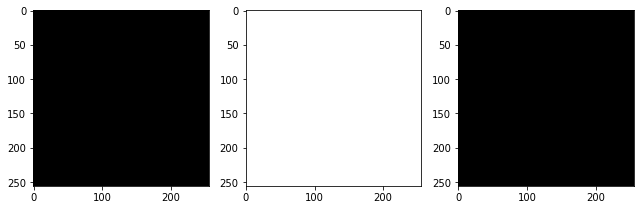

In [136]:
fig, axs = plt.subplots(ncols=3, figsize=(9, 3))

for i, ax in enumerate(axs):
    ax.imshow(x[i])

fig.tight_layout()   
# fig.savefig("./2-bn_4.png")

In [137]:
x_tensor = tf.convert_to_tensor(x, dtype="float32")
bn = layers.BatchNormalization(trainable=True)(x_tensor)

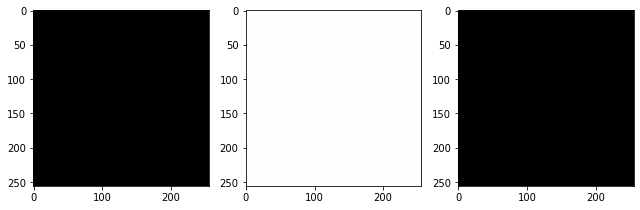

In [138]:
bn_np = bn.numpy()

fig, axs = plt.subplots(ncols=3, figsize=(9, 3))

for i, ax in enumerate(axs):
    ax.imshow(bn_np[i])

fig.tight_layout()   
# fig.savefig("./2-bn_5.png")

In [139]:
x[0,0,0]

array([0., 0., 0.])

In [140]:
bn_np[0,0,0]

array([0., 0., 0.], dtype=float32)

In [141]:
from tensorflow.keras.models import Sequential

model = Sequential([
    layers.BatchNormalization()
])
model.compile()

In [142]:
bn_train = model(x_tensor, training=True)
bn_np = bn_train.numpy()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


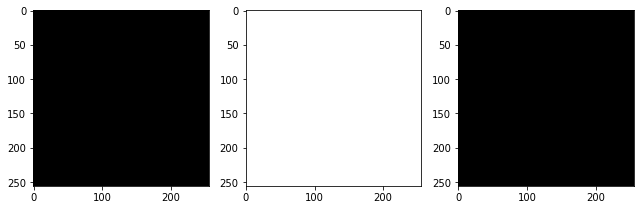

In [143]:
fig, axs = plt.subplots(ncols=3, figsize=(9, 3))

for i, ax in enumerate(axs):
    ax.imshow(bn_np[i])

fig.tight_layout()   
# fig.savefig("./2-bn_5.png")

In [144]:
for b in bn_np:
    print(b.min(), b.max())

-0.70609677 -0.70609677
1.4121934 1.4121934
-0.70609677 -0.70609677


In [122]:
mean = model.layers[0].variables[2].numpy()
var  = model.layers[0].variables[3].numpy()

In [123]:
print(mean, var)

[0.01909063 0.01760082 0.01775435] [0.96014225 0.96034366 0.96050215]
